# Proyecto Análisis de Comportamiento Musical

# 📝 Descripción del Proyecto <a id='descripcion'></a>

En este proyecto de análisis de datos, se estudian y comparan las preferencias musicales de los habitantes de dos ciudades: Springfield y Shelbyville. El objetivo principal es probar una hipótesis sobre el comportamiento de los usuarios en servicios de música en línea.

# 🎯 Objetivo <a id='objetivo'></a>

Evaluar si los usuarios de Springfield y Shelbyville muestran patrones de escucha musical distintos, basándose en datos de streaming, con el fin de tomar decisiones informadas en estrategias de contenido y marketing.

## Etapa 1. Carga y visualización de los datos <a id='data_review'></a>

In [39]:
# Importar librerías
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [40]:
# Leer el archivo y almacenarlo en df
df=pd.read_csv('music_project_en.csv')

In [41]:
# Obtener las 10 primeras filas de la tabla df
df.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Shelbyville,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Springfield,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Shelbyville,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Shelbyville,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Springfield,08:34:34,Monday
5,842029A1,Chains,Obladaet,rusrap,Shelbyville,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Springfield,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Springfield,20:47:49,Wednesday
8,8FA1D3BE,L’estate,Julia Dalia,ruspop,Springfield,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Shelbyville,21:20:49,Wednesday


In [42]:
# Obtener la información general sobre nuestros datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63736 non-null  object
 2   artist    57512 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


Según lo observado en la tabla. Contiene siete columnas. Almacenan los mismos tipos de datos: `object`.

Según la documentación:
- `' userID'`: identificador del usuario o la usuaria;
- `'Track'`: título de la canción;
- `'artist'`: nombre del artista;
- `'genre'`: género de la pista;
- `'City'`: ciudad del usuario o la usuaria;
- `'time'`: la hora exacta en la que se reprodujo la canción;
- `'Day'`: día de la semana.

Podemos ver tres problemas con el estilo en los encabezados de la tabla:
1. Algunos encabezados están en mayúsculas, otros en minúsculas.
2. Hay espacios en algunos encabezados.
3. Es importante usar "_" para separar palabras en nombres de variables como user_id, de esta manera es más legible y comprensible para cualquiera que vea el código.



##  Etapa 2. Preprocesamiento de datos <a id='preprocesamiento'></a>

 ### Normalización de nombres de columnas

In [43]:
# Muestra los nombres de las columnas
print(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')


In [44]:
columns_limpias = []  # Lista para guardar los nuevos nombres de columnas

for column in df.columns:
    # 1. Quitar espacios al inicio y al final
    columna = column.strip()
    # 2. Convertir a minúsculas
    columna = columna.lower()
    # 4. Agregar a la lista
    columns_limpias.append(columna)

# Asignar los nuevos nombres al DataFrame
df.columns = columns_limpias

# Verifica el resultado
print(df.columns)

Index(['userid', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


In [45]:
# Cambiar el nombre de la columna "userid"
df.rename(columns={'userid': 'user_id'}, inplace=True)
print(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')


### Valores ausentes

In [46]:
# Calcular el número de valores ausentes
null_values = df.isnull().sum()
print(null_values)

user_id       0
track      1343
artist     7567
genre      1198
city          0
time          0
day           0
dtype: int64


Los valores ausentes en `track` , `artist`, `'genre'` pueden afectar la comparación entre las preferencias musicales de Springfield y Shelbyville. Debido a que no se puede saber las razones por las cuales hay datos ausentes en esas columnas. Se hará lo siguiente:
* rellenar estos valores ausentes con un valor predeterminado;
* evaluar cuánto podrían afectar los valores ausentes a los cómputos.

In [47]:
columns_to_replace = ['track','artist','genre']

for col in columns_to_replace:
    df[col].fillna('unknown', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  65079 non-null  object
 1   track    65079 non-null  object
 2   artist   65079 non-null  object
 3   genre    65079 non-null  object
 4   city     65079 non-null  object
 5   time     65079 non-null  object
 6   day      65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB
None


C:\Users\ceci-\AppData\Local\Temp\ipykernel_21984\3736129519.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('unknown', inplace=True)


In [48]:
# Calcular el número de valores ausentes
valores_ausentes_now = df.isnull().sum()
# Contar valores ausentes
print(valores_ausentes_now)

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64


### Valores Duplicados 

In [49]:
# Contar duplicados explícitos
print(df.duplicated().sum())

3826


In [50]:
# Eliminar duplicados explícitos
df.drop_duplicates(inplace=True)

In [51]:
# Comprobar de nuevo si hay duplicados
print(df.duplicated().sum()) 

0


Eliminar los duplicados implícitos en la columna `genre`. Por ejemplo, el nombre de un género se puede escribir de varias formas. Dichos errores también pueden afectar al resultado.

Para hacerlo, primero mostremos una lista de nombres de género únicos, ordenados en orden alfabético.

In [52]:
# Inspeccionar los nombres de géneros únicos
print(df['genre'].unique()) 
print(df['genre'].nunique())

['rock' 'pop' 'folk' 'dance' 'rusrap' 'ruspop' 'world' 'electronic'
 'unknown' 'alternative' 'children' 'rnb' 'hip' 'jazz' 'postrock' 'latin'
 'classical' 'metal' 'reggae' 'triphop' 'blues' 'instrumental' 'rusrock'
 'dnb' 'türk' 'post' 'country' 'psychedelic' 'conjazz' 'indie'
 'posthardcore' 'local' 'avantgarde' 'punk' 'videogame' 'techno' 'house'
 'christmas' 'melodic' 'caucasian' 'reggaeton' 'soundtrack' 'singer' 'ska'
 'salsa' 'ambient' 'film' 'western' 'rap' 'beats' "hard'n'heavy"
 'progmetal' 'minimal' 'tropical' 'contemporary' 'new' 'soul' 'holiday'
 'german' 'jpop' 'spiritual' 'urban' 'gospel' 'nujazz' 'folkmetal'
 'trance' 'miscellaneous' 'anime' 'hardcore' 'progressive' 'korean'
 'numetal' 'vocal' 'estrada' 'tango' 'loungeelectronic' 'classicmetal'
 'dubstep' 'club' 'deep' 'southern' 'black' 'folkrock' 'fitness' 'french'
 'disco' 'religious' 'hiphop' 'drum' 'extrememetal' 'türkçe'
 'experimental' 'easy' 'metalcore' 'modern' 'argentinetango' 'old' 'swing'
 'breaks' 'eurofolk' 

Se encontró los siguientes duplicados implícitos:
* `hip`
* `hop`
* `hip-hop`

Para deshacerme de ellos, voy a crear una función llamada `replace_wrong_genres()` con dos parámetros:
* `wrong_genres=`: esta es una lista que contiene todos los valores que necesito reemplazar.
* `correct_genre=`: este es un string que voy a utilizar como reemplazo.

In [53]:
# Función para reemplazar duplicados implícitos
def replace_wrong_genres(df, column, wrong_values, correct_value):
    for wrong_value in wrong_values:
        df[column] = df[column].replace(wrong_value, correct_value) 
    return df

wrong_genre = ['hip', 'hop','hip-hop']
correct_genre = 'hiphop'
df = replace_wrong_genres(df, 'genre', wrong_genre , correct_genre) 

In [54]:
# Comprobación de duplicados implícitos
print(df['genre'].unique())
print(df['genre'].nunique())

['rock' 'pop' 'folk' 'dance' 'rusrap' 'ruspop' 'world' 'electronic'
 'unknown' 'alternative' 'children' 'rnb' 'hiphop' 'jazz' 'postrock'
 'latin' 'classical' 'metal' 'reggae' 'triphop' 'blues' 'instrumental'
 'rusrock' 'dnb' 'türk' 'post' 'country' 'psychedelic' 'conjazz' 'indie'
 'posthardcore' 'local' 'avantgarde' 'punk' 'videogame' 'techno' 'house'
 'christmas' 'melodic' 'caucasian' 'reggaeton' 'soundtrack' 'singer' 'ska'
 'salsa' 'ambient' 'film' 'western' 'rap' 'beats' "hard'n'heavy"
 'progmetal' 'minimal' 'tropical' 'contemporary' 'new' 'soul' 'holiday'
 'german' 'jpop' 'spiritual' 'urban' 'gospel' 'nujazz' 'folkmetal'
 'trance' 'miscellaneous' 'anime' 'hardcore' 'progressive' 'korean'
 'numetal' 'vocal' 'estrada' 'tango' 'loungeelectronic' 'classicmetal'
 'dubstep' 'club' 'deep' 'southern' 'black' 'folkrock' 'fitness' 'french'
 'disco' 'religious' 'drum' 'extrememetal' 'türkçe' 'experimental' 'easy'
 'metalcore' 'modern' 'argentinetango' 'old' 'swing' 'breaks' 'eurofolk'
 'stone

### Observaciones <a id='data_preprocessing_conclusions'></a>

Se encontró 3826 valores duplicados, se eliminaron esos valores duplicados, quedando solo 61253 filas con las cuales trabajar. Después se corrigió los duplicados implícitos en la columna 'genre', para ello fue importante identificar los valores únicos , identificar los valores a cambiar y establecer el valor que predominará.En nuestro caso primero habían 269 valores únicos y después de corregir los duplicados implícitos quedaron 266 valores únicos.

## Etapa 3. Análisis exploratorio de datos <a id='eda'></a>

### Análisis por Usuario

In [55]:
# Contar cuántas veces aparece cada usuario
user_activity = df.groupby(['city', 'user_id'])['track'].count().reset_index(name='count')
# Mostrar los resultados
print(user_activity)

              city   user_id  count
0      Shelbyville  100173ED      1
1      Shelbyville  10089377      3
2      Shelbyville  10101201      2
3      Shelbyville  101861D1      2
4      Shelbyville  10189D10      4
...            ...       ...    ...
41776  Springfield  FFF91C68      1
41777  Springfield  FFF92382      1
41778  Springfield  FFF965B2      2
41779  Springfield   FFFBB52      4
41780  Springfield   FFFD03A      1

[41781 rows x 3 columns]


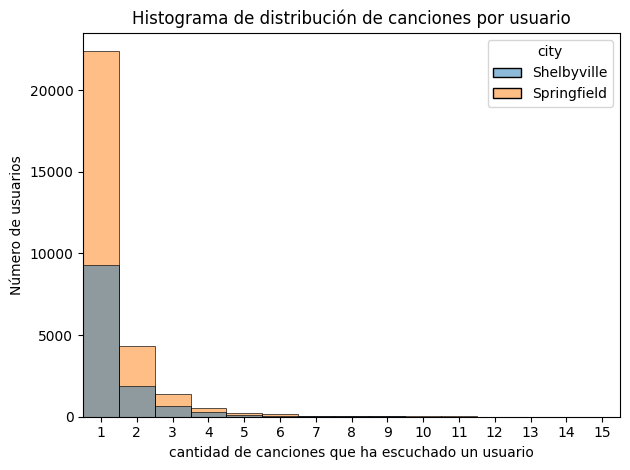

In [56]:
# Histograma con límites hasta count = 15
sns.histplot(
    data=user_activity,
    x='count',
    hue='city',
    multiple='layer',
    bins=range(1, 17),  # de 1 a 16 para incluir el bin de 15
    discrete=True
)

plt.title('Histograma de distribución de canciones por usuario')
plt.xlabel('cantidad de canciones que ha escuchado un usuario')
plt.ylabel('Número de usuarios')
plt.xticks(range(1, 16))  # ticks del eje x hasta 15
plt.xlim(0.5, 15.5)       # límite del eje x visualmente hasta 15
plt.tight_layout()
plt.show()


### Análisis por Género Musical

In [57]:
num_generos_unicos = df['genre'].nunique()
print(f"Número de géneros únicos en todo el dataset: {num_generos_unicos}")

Número de géneros únicos en todo el dataset: 266


In [58]:
df.groupby('city')['genre'].nunique()

city
Shelbyville    202
Springfield    250
Name: genre, dtype: int64

In [59]:
#Agrupar y contar tracks por ciudad y género
top_genre_per_city = (
    df.groupby(['city', 'genre'])['track']
      .count()
      .reset_index(name='count')  # asignar un nombre claro a la columna de conteo
)

# Ordenar de mayor a menor por conteo y obtener top 10 géneros por ciudad
top_genre = (
    top_genre_per_city
    .sort_values(['city', 'count'], ascending=[True, False])
    .groupby('city')
    .head(10)
    .reset_index(drop=True)
)

print(top_genre)

           city        genre  count
0   Shelbyville          pop   2431
1   Shelbyville        dance   1932
2   Shelbyville         rock   1879
3   Shelbyville   electronic   1736
4   Shelbyville       hiphop    960
5   Shelbyville  alternative    649
6   Shelbyville    classical    646
7   Shelbyville       rusrap    564
8   Shelbyville       ruspop    538
9   Shelbyville        world    515
10  Springfield          pop   5892
11  Springfield        dance   4435
12  Springfield         rock   3965
13  Springfield   electronic   3786
14  Springfield       hiphop   2096
15  Springfield    classical   1616
16  Springfield        world   1432
17  Springfield  alternative   1379
18  Springfield       ruspop   1372
19  Springfield       rusrap   1161


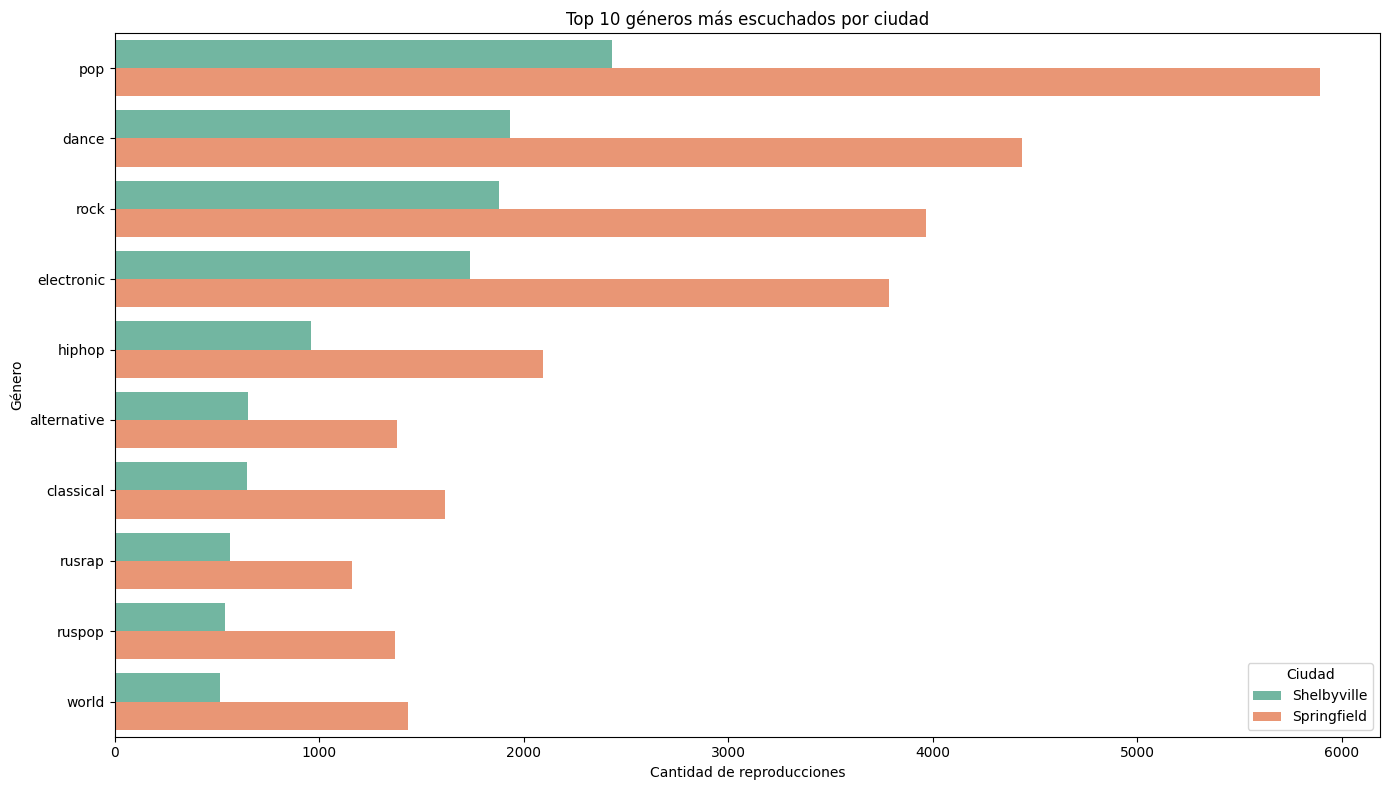

In [60]:
plt.figure(figsize=(14,8))
sns.barplot(data=top_genre, x='count', y='genre', hue='city', dodge=True, palette='Set2')

plt.title('Top 10 géneros más escuchados por ciudad')
plt.xlabel('Cantidad de reproducciones')
plt.ylabel('Género')
plt.legend(title='Ciudad')
plt.tight_layout()
plt.show()

### Análisis Temporal del Consumo Musical

In [61]:
# Contar canciones reproducidas por ciudad
reproducciones_por_ciudad = df.groupby('city')['track'].count()

# Mostrar resultados
print("Reproducciones por ciudad:")
print(reproducciones_por_ciudad)

Reproducciones por ciudad:
city
Shelbyville    18512
Springfield    42741
Name: track, dtype: int64


In [62]:
# Agrupar por ciudad y día, contar canciones, y ordenar dentro de cada ciudad
songs_by_day_city = df.groupby(['city', 'day'])['track'].count()
songs_by_day_city = songs_by_day_city.sort_values(ascending=False)

print("Canciones reproducidas por día y ciudad:")
print(songs_by_day_city)

Canciones reproducidas por día y ciudad:
city         day      
Springfield  Friday       15945
             Monday       15740
             Wednesday    11056
Shelbyville  Wednesday     7003
             Friday        5895
             Monday        5614
Name: track, dtype: int64


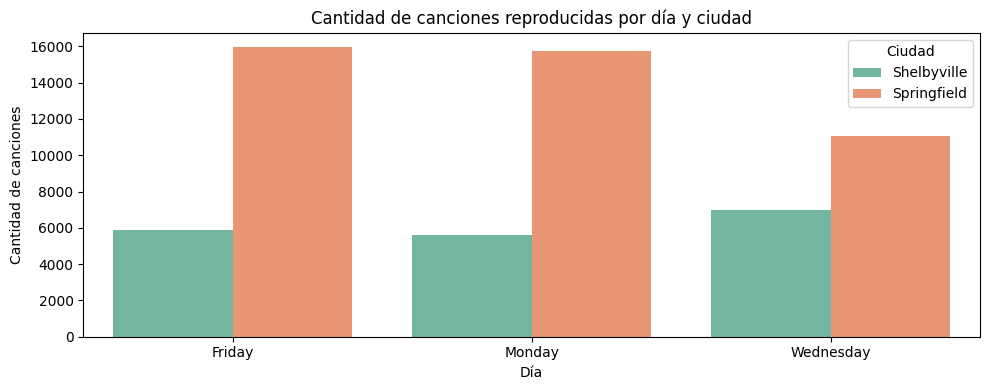

In [63]:
songs_by_day_city = df.groupby(['city', 'day'])['track'].count().reset_index(name='count')
plt.figure(figsize=(10,4))
sns.barplot(data=songs_by_day_city, x='day', y='count', hue='city', palette='Set2')

plt.title('Cantidad de canciones reproducidas por día y ciudad')
plt.xlabel('Día')
plt.ylabel('Cantidad de canciones')
plt.legend(title='Ciudad')
plt.tight_layout()
plt.show()

C:\Users\ceci-\AppData\Local\Temp\ipykernel_21984\4238688263.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


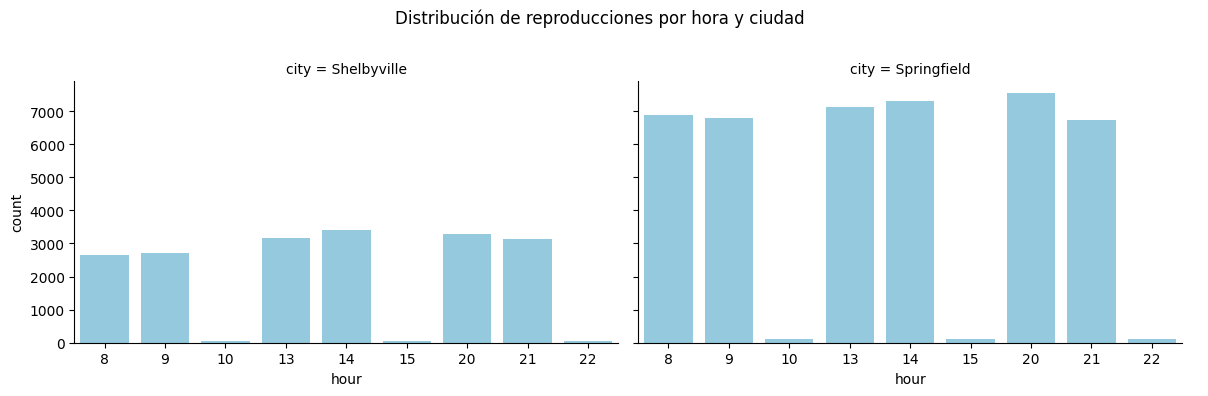

In [64]:
# Distribucion de canciones por hora y ciudad
# Asegúrate que tienes la columna 'hour'
df['hour'] = pd.to_datetime(df['time']).dt.hour

sns.catplot(
    data=df,
    x='hour',
    kind='count',
    col='city',
    col_wrap=2,  # Ajusta según número de ciudades
    height=4,
    aspect=1.5,
    color='skyblue'
)

plt.subplots_adjust(top=0.8)
plt.suptitle('Distribución de reproducciones por hora y ciudad')
plt.show()

In [65]:
# Análisis de escuchas por ciudad, día de la semana y momento del día
# Crear columna de franja horaria
def clasificar_momento(hora):
    if 5 <= hora < 12:
        return 'mañana'
    elif 12 <= hora < 17:
        return 'tarde'
    elif 17 <= hora < 21:
        return 'noche'
    else:
        return 'madrugada'

df['momento_dia'] = df['hour'].apply(clasificar_momento)

# Tabla cruzada: ciudad + día vs momento del día
tabla_cruzada_ciudad = pd.crosstab(
    [df['city'], df['day']],  # filas: ciudad y día
    df['momento_dia']         # columnas: momento del día
)

print(tabla_cruzada_ciudad)


momento_dia            madrugada  mañana  noche  tarde
city        day                                       
Shelbyville Friday          1032    1726   1034   2103
            Monday           972    1605   1014   2023
            Wednesday       1182    2060   1249   2512
Springfield Friday          2540    5493   2754   5158
            Monday          2455    5258   2780   5247
            Wednesday       1849    3050   1998   4159


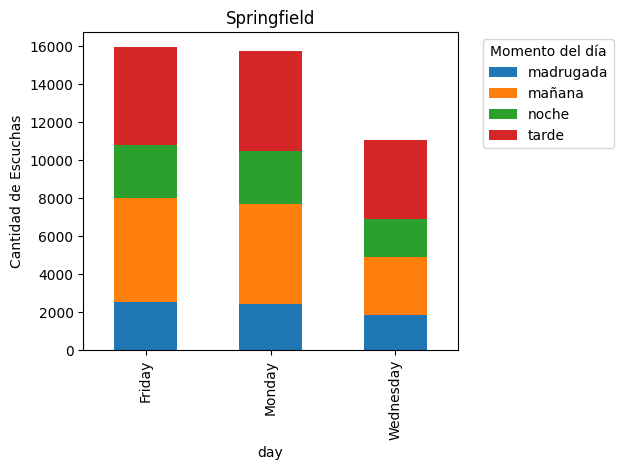

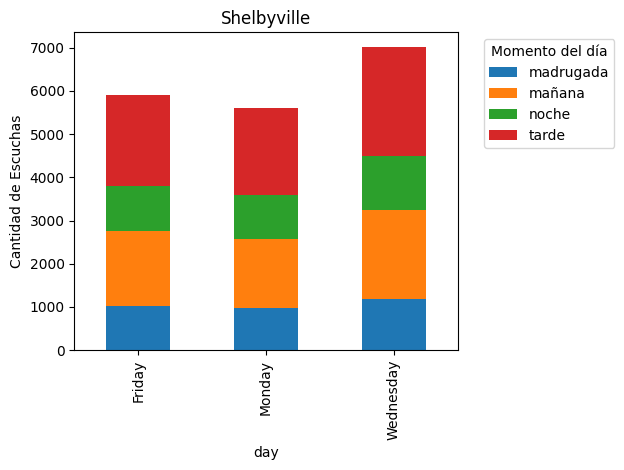

In [66]:
# Gráfico por ciudad
tabla_cruzada_ciudad.loc['Springfield'].plot(kind='bar', stacked=True, title='Springfield')
plt.ylabel('Cantidad de Escuchas')
plt.legend(title='Momento del día', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

tabla_cruzada_ciudad.loc['Shelbyville'].plot(kind='bar', stacked=True, title='Shelbyville')
plt.ylabel('Cantidad de Escuchas')
plt.legend(title='Momento del día', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

### Análisis por artista y canción

In [67]:
artistas_unicos = df['artist'].nunique()
print(f"Número de artistas únicos: {artistas_unicos}")

Número de artistas únicos: 37807


In [68]:
artistas_unicos_por_ciudad = df.groupby('city')['artist'].nunique()
print(f"Número de artistas únicos: {artistas_unicos_por_ciudad}")

Número de artistas únicos: city
Shelbyville    13924
Springfield    28627
Name: artist, dtype: int64


In [69]:
# Filtrar el DataFrame para excluir los artistas "unknown"
df_filtrado = df[df['artist'] != 'unknown']
# Contar cuántas veces fue escuchado cada artista en cada ciudad
artistas_por_ciudad = df_filtrado.groupby(['city', 'artist']).size().reset_index(name='reproducciones')

In [70]:
# Ordenar por ciudad y reproducciones descendentes
artistas_por_ciudad = artistas_por_ciudad.sort_values(['city', 'reproducciones'], ascending=[True, False])

# Obtener los top 10 por ciudad usando groupby + head(10)
top10_artistas_por_ciudad = artistas_por_ciudad.groupby('city').head(10).reset_index(drop=True)

print(top10_artistas_por_ciudad)

           city            artist  reproducciones
0   Shelbyville         Kartvelli              38
1   Shelbyville             MALFA              28
2   Shelbyville       The Seasons              28
3   Shelbyville       Real Bodrit              27
4   Shelbyville            Rocket              22
5   Shelbyville        Irina Shok              19
6   Shelbyville  Dr. Living Dead!              18
7   Shelbyville          KoperniK              18
8   Shelbyville           SEREBRO              18
9   Shelbyville       Sabine Kors              18
10  Springfield         Kartvelli              89
11  Springfield             MALFA              81
12  Springfield       Real Bodrit              63
13  Springfield             RELFY              52
14  Springfield        Irina Shok              51
15  Springfield          KoperniK              51
16  Springfield       The Seasons              51
17  Springfield  Dr. Living Dead!              50
18  Springfield  Argishty (Duduk)              49


In [71]:
# Filtrar el DataFrame para excluir los track "unknown"
df_filtrado_1 = df[df['track'] != 'unknown']
# Contar escuchas por canción (track) y ciudad
canciones_por_ciudad = df_filtrado_1.groupby(['city', 'track']).size().reset_index(name='reproducciones')

# Ordenar por ciudad y reproducciones descendentes
canciones_por_ciudad = canciones_por_ciudad.sort_values(['city', 'reproducciones'], ascending=[True, False])

# Obtener las top 5 canciones por ciudad
top5_canciones_por_ciudad = canciones_por_ciudad.groupby('city').head(5).reset_index(drop=True)

print(top5_canciones_por_ciudad)

          city           track  reproducciones
0  Shelbyville           Brand              38
1  Shelbyville     All for You              28
2  Shelbyville         So Long              28
3  Shelbyville      Going Back              27
4  Shelbyville  Moscow Calling              24
5  Springfield           Brand              89
6  Springfield         So Long              82
7  Springfield      Going Back              63
8  Springfield  Moscow Calling              63
9  Springfield      Balenciaga              56


In [72]:
genre_unknown = df[df['genre'] == 'unknown']
genre_unknown_dia = genre_unknown.groupby('day')['genre'].size()
# print("Genre = 'unknown' por día de la semana:")
# print(genre_unknown_dia)

artist_unknown = df[df['artist'] == 'unknown']
artist_unknown_dia = artist_unknown.groupby('day')['genre'].size()
# print("artist = 'unknown' por día de la semana:")
# print(artist_unknown_dia)

track_unknown = df[df['track'] == 'unknown']
track_unknown_dia = track_unknown.groupby('day')['genre'].size()
# print("track = 'unknown' por día de la semana:")
# print(track_unknown_dia)

# Total de registros por día
total_por_dia = df['day'].value_counts()
# Calcular el porcentaje de 'unknown' por día
genre_pct = (genre_unknown_dia / total_por_dia) 
artist_pct = (artist_unknown_dia / total_por_dia)
track_pct = (track_unknown_dia / total_por_dia) 

# Unir en una sola tabla
unknown_summary = pd.DataFrame({
    'genre_unknown_%': genre_pct,
    'artist_unknown_%': artist_pct,
    'track_unknown_%': track_pct
}).round(2)  # Redondeamos a 2 decimales
unknown_summary


,genre_unknown_%,artist_unknown_%,track_unknown_%
day,,,
Friday,0.02,0.11,0.02
Monday,0.02,0.12,0.03
Wednesday,0.02,0.12,0.02


## Prueba de Hipótesis <a id='activity'></a>

Hipótesis 1:
- H0: No hay diferencia significativa en la cantidad promedio de reproducciones por usuario entre Springfield y Shelbyville.
- H1: Los usuarios de Springfield reproducen más canciones (mayor promedio) que los de Shelbyville.

In [73]:
# Para Springfield
springfield_usuarios = df[df['city'] == 'Springfield']
springfield_reproducciones = springfield_usuarios.groupby('user_id').size().reset_index(name='reproducciones')

# Para Shelbyville
shelbyville_usuarios = df[df['city'] == 'Shelbyville']
shelbyville_reproducciones = shelbyville_usuarios.groupby('user_id').size().reset_index(name='reproducciones')

# Test t (asumiendo varianzas diferentes)
t_stat, p_val = ttest_ind(
    springfield_reproducciones['reproducciones'],
    shelbyville_reproducciones['reproducciones'],
    equal_var=False
)

# Imprimir resultado
print("🔍 Test t para comparación de medias entre ciudades")
print(f"Estadístico t = {t_stat:.3f}")
print(f"Valor p = {p_val:.4f}")

# Umbral de significancia
alpha = 0.05

# Evaluar hipótesis con los datos correctos
if p_val < alpha:
    if springfield_reproducciones['reproducciones'].mean() > shelbyville_reproducciones['reproducciones'].mean():
        conclusion = "✅ Se rechaza la hipótesis nula: Springfield tiene usuarios más activos que Shelbyville."
    else:
        conclusion = "✅ Se rechaza la hipótesis nula: Shelbyville tiene usuarios más activos que Springfield."
else:
    conclusion = "❌ No se rechaza la hipótesis nula: No hay diferencia significativa en la actividad promedio entre ambas ciudades."

print("\n📌 Conclusión:")
print(conclusion)



🔍 Test t para comparación de medias entre ciudades
Estadístico t = -2.295
Valor p = 0.0217

📌 Conclusión:
✅ Se rechaza la hipótesis nula: Shelbyville tiene usuarios más activos que Springfield.


Hipótesis 2:

H₀ (Hipótesis nula):
No hay evidencia suficiente para decir que los días pico difieren entre ciudades.

H₁ (Hipótesis alternativa):
La distribución de escuchas por día difiere entre ciudades.


In [74]:
# Crear tabla de contingencia: filas = ciudad, columnas = día, valores = cantidad de escuchas
tabla_contingencia = pd.crosstab(df['city'], df['day'])

print("Tabla de contingencia (escuchas por ciudad y día):")
print(tabla_contingencia)

# Test Chi-cuadrado
chi2, p_val, dof, expected = chi2_contingency(tabla_contingencia)

print(f"\nEstadístico Chi-cuadrado: {chi2:.3f}")
print(f"Valor p: {p_val:.4f}")
print(f"Grados de libertad: {dof}")

# Nivel de significancia
alpha = 0.05

# Interpretación
if p_val < alpha:
    conclusion = "✅ Se rechaza la hipótesis nula: La distribución de escuchas por día difiere entre ciudades."
else:
    conclusion = "❌ No se rechaza la hipótesis nula: No hay evidencia suficiente para decir que los días pico difieren entre ciudades."

print("\nConclusión:")
print(conclusion)

Tabla de contingencia (escuchas por ciudad y día):
day          Friday  Monday  Wednesday
city                                  
Shelbyville    5895    5614       7003
Springfield   15945   15740      11056

Estadístico Chi-cuadrado: 891.561
Valor p: 0.0000
Grados de libertad: 2

Conclusión:
✅ Se rechaza la hipótesis nula: La distribución de escuchas por día difiere entre ciudades.


# Conclusiones <a id='end'></a>

🎧 1. Volumen de consumo marcadamente distinto
- Springfield muestra un volumen de reproducciones significativamente mayor que Shelbyville (más del doble).
- Esta diferencia sugiere un mayor engagement o una base de usuarios más activa, lo que puede ser útil para priorizar inversión en campañas o lanzamientos dirigidos.

📅 Patrones diferenciados de consumo por día
- Springfield presenta un patrón de consumo más equilibrado, con picos claros los lunes y viernes, lo que sugiere un hábito constante de escucha en inicios y cierres de semana. Esto lo convierte en un público ideal para estrenos regulares o promociones de inicio de semana y fines de semana.
- Shelbyville, en cambio, muestra una concentración significativa de escuchas los miércoles, revelando un comportamiento menos predecible. Esto abre la puerta a estrategias más puntuales y personalizadas.
- A pesar de estas diferencias en días de mayor actividad, ambas ciudades comparten franjas horarias similares de mayor escucha, lo que permite sincronizar horarios de lanzamientos o campañas, adaptando el día de publicación según la ciudad.

🎼 3. Diversidad musical
- Springfield no solo tiene más géneros únicos (250 vs 202), sino también más artistas distintos (28,627 vs 13,924).
- Los mismos géneros aparecen como los más escuchados tanto en Springfield como en Shelbyville. Esto sugiere que, existe un núcleo de preferencias comunes. Esto permitirá crear contenido (como playlists, campañas o promociones) usando estos géneros, y es más probable que funcione bien en las dos ciudades al mismo tiempo.

📊 4. Artistas y canciones compartidos vs. específicos
- La mayoria de artistas y canciones aparecen en el top de ambas ciudades (Kartvelli, MALFA, Irina Shok, etc.), lo que sugiere un núcleo de gustos comunes.

📊 5. Diferencia en actividad de usuarios
- Springfield tiene más usuarios y más reproducciones totales, pero su comportamiento promedio por usuario es menos intenso.
- Shelbyville, aunque con menos personas, tiene usuarios que escuchan más música individualmente.

🧠 6. Los resultados del test de chi-cuadrado muestran diferencias significativas en la distribución de reproducciones musicales por día entre Springfield y Shelbyville. Esto confirma que cada ciudad presenta patrones distintos de consumo semanal, lo cual justifica enfoques diferenciados en estrategias de contenido y marketing. 


